# Integrating PCA in Pipelines - Lab

## Introduction

In a previous section, you learned about how to use pipelines in scikit-learn to combine several supervised learning algorithms in a manageable pipeline. In this lesson, you will integrate PCA along with classifiers in the pipeline. 

## Objectives

In this lab you will: 

- Integrate PCA in scikit-learn pipelines 

## The Data Science Workflow

You will be following the data science workflow:

1. Initial data inspection, exploratory data analysis, and cleaning
2. Feature engineering and selection
3. Create a baseline model
4. Create a machine learning pipeline and compare results with the baseline model
5. Interpret the model and draw conclusions

##  Initial data inspection, exploratory data analysis, and cleaning

You'll use a dataset created by the Otto group, which was also used in a [Kaggle competition](https://www.kaggle.com/c/otto-group-product-classification-challenge/data). The description of the dataset is as follows:

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They are selling millions of products worldwide every day, with several thousand products being added to their product line.

A consistent analysis of the performance of their products is crucial. However, due to their global infrastructure, many identical products get classified differently. Therefore, the quality of product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights the Otto Group can generate about their product range.

In this lab, you'll use a dataset containing:
- A column `id`, which is an anonymous id unique to a product
- 93 columns `feat_1`, `feat_2`, ..., `feat_93`, which are the various features of a product
- a column `target` - the class of a product



The dataset is stored in the `'otto_group.csv'` file. Import this file into a DataFrame called `data`, and then: 

- Check for missing values 
- Check the distribution of columns 
- ... and any other things that come to your mind to explore the data 

In [2]:
# Your code hereimport pandas as pd
import numpy as np
import pandas as pd
# Load the dataset
data = pd.read_csv('otto_group.csv')

# Preview the data
data.head()


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [3]:
# Your code here
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])


Missing values per column:
 Series([], dtype: int64)


In [4]:
# Your code here# Basic shape and column info
print("Shape of dataset:", data.shape)
print("\nData Types:\n", data.dtypes)

# Summary statistics (only for numerical columns)
data.describe().T



Shape of dataset: (61878, 95)

Data Types:
 id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
            ...  
feat_90     int64
feat_91     int64
feat_92     int64
feat_93     int64
target     object
Length: 95, dtype: object


,count,mean,std,min,25%,50%,75%,max
id,61878.0,30939.500000,17862.784315,1.0,15470.25,30939.5,46408.75,61878.0
feat_1,61878.0,0.386680,1.525330,0.0,0.00,0.0,0.00,61.0
feat_2,61878.0,0.263066,1.252073,0.0,0.00,0.0,0.00,51.0
feat_3,61878.0,0.901467,2.934818,0.0,0.00,0.0,0.00,64.0
feat_4,61878.0,0.779081,2.788005,0.0,0.00,0.0,0.00,70.0
...,...,...,...,...,...,...,...,...
feat_89,61878.0,0.457772,1.527385,0.0,0.00,0.0,0.00,61.0
feat_90,61878.0,0.812421,4.597804,0.0,0.00,0.0,0.00,130.0
feat_91,61878.0,0.264941,2.045646,0.0,0.00,0.0,0.00,52.0
feat_92,61878.0,0.380119,0.982385,0.0,0.00,0.0,0.00,19.0



Target distribution:
 Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64


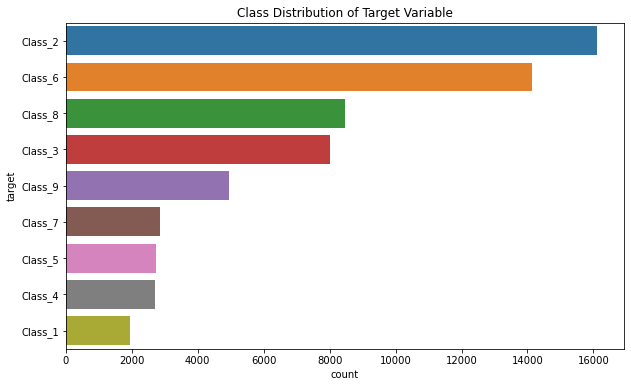

In [5]:
# Your code here
# Distribution of target labels
target_distribution = data['target'].value_counts()
print("\nTarget distribution:\n", target_distribution)

# Optional: visualize the target distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(y='target', data=data, order=target_distribution.index)
plt.title("Class Distribution of Target Variable")
plt.show()


In [6]:
# Your code here
# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 0


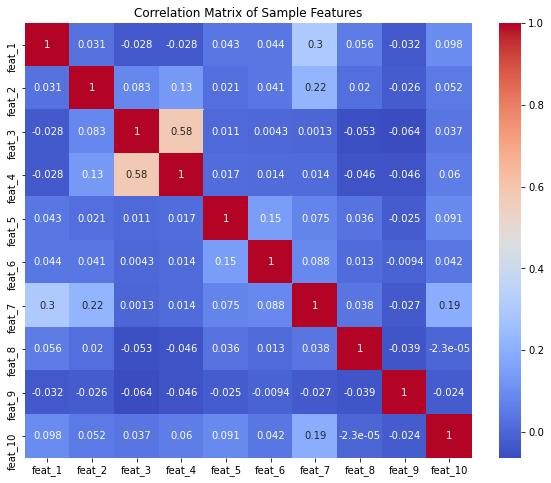

In [7]:
# Your code here
# Compute correlations (optional due to high dimensionality)
correlation = data.drop(columns=['id', 'target']).corr()

# Show correlation heatmap of first 10 features to keep it readable
plt.figure(figsize=(10, 8))
sns.heatmap(correlation.iloc[:10, :10], cmap='coolwarm', annot=True)
plt.title("Correlation Matrix of Sample Features")
plt.show()


If you look at all the histograms, you can tell that a lot of the data are zero-inflated, so most of the variables contain mostly zeros and then some higher values here and there. No normality, but for most machine learning techniques this is not an issue. 

(61878, 95)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null

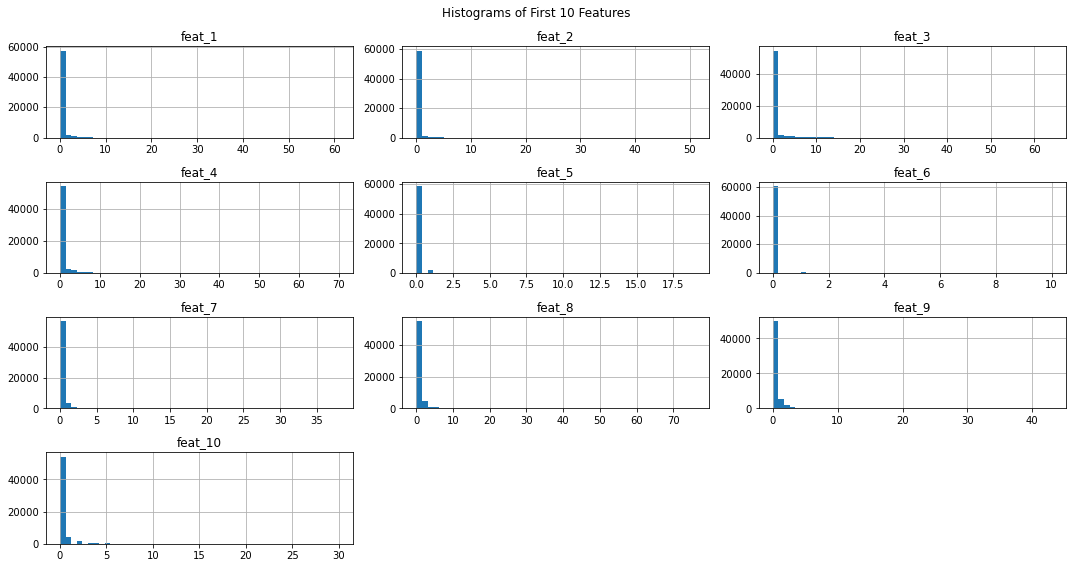

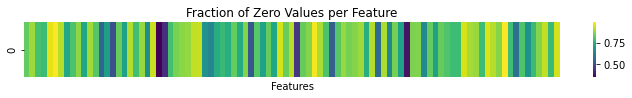

In [8]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('otto_group.csv')

# Quick look at the data
print(data.shape)
print(data.info())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Exclude non-feature columns (like 'id' and 'target')
features = data.drop(columns=['id', 'target'])

# Check percentage of zeros in each feature
zero_fraction = (features == 0).sum() / features.shape[0]

# Display features where more than 90% of values are zero
print("\nFeatures with more than 90% zeros:")
print(zero_fraction[zero_fraction > 0.9].sort_values(ascending=False))

# Plot histograms of a few features to visualize the distribution
features.iloc[:, :10].hist(bins=50, figsize=(15, 8))
plt.suptitle('Histograms of First 10 Features')
plt.tight_layout()
plt.show()

# Optional: plot a heatmap of zero fractions across all features
plt.figure(figsize=(12, 1))
sns.heatmap([zero_fraction.values], cmap="viridis", cbar=True, xticklabels=False)
plt.title("Fraction of Zero Values per Feature")
plt.xlabel("Features")
plt.show()


Because there are so many zeroes, most values above zero will seem to be outliers. The safe decision for this data is to not delete any outliers and see what happens. With many 0s, sparse data is available and high values may be super informative. Moreover, without having any intuitive meaning for each of the features, we don't know if a value of ~260 is actually an outlier.

In [9]:
# Your code here
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Make a copy of the original data to work with
df = data.copy()

# Encode the target labels (e.g., 'Class_1' -> 0, 'Class_2' -> 1, ..., 'Class_9' -> 8)
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

# Separate features and target
X = df.drop(columns=['id', 'target'])
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Confirm shape
print("Feature matrix shape:", X_scaled.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (61878, 93)
Target vector shape: (61878,)


## Feature engineering and selection with PCA

Have a look at the correlation structure of your features using a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

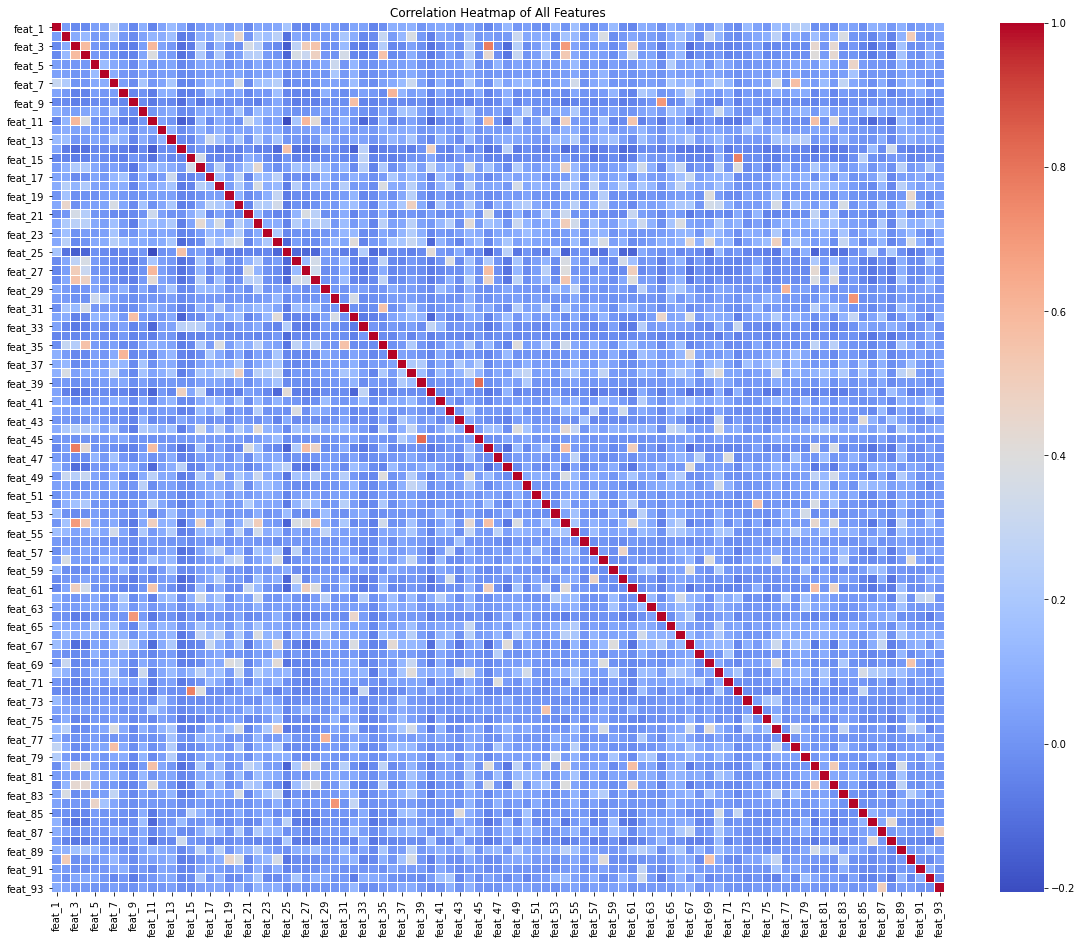

In [10]:
# Your code hereimport matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

# Plot the full heatmap (very dense, not ideal for interpretation)
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.1)
plt.title("Correlation Heatmap of All Features")
plt.show()


Use PCA to select a number of features in a way that you still keep 80% of your explained variance.

In [11]:
# Your code here
# Get absolute values of correlation (ignore negative sign)
abs_corr = corr_matrix.abs()

# Set self-correlations (diagonal) to 0 to avoid picking them
np.fill_diagonal(abs_corr.values, 0)

# Unstack and sort the correlations
high_corr_pairs = abs_corr.unstack().sort_values(ascending=False).drop_duplicates()

# Show top 15 most correlated pairs
print("Top 15 most highly correlated feature pairs:")
print(high_corr_pairs.head(15))


Top 15 most highly correlated feature pairs:
feat_45  feat_39    0.824146
feat_46  feat_3     0.777517
feat_72  feat_15    0.764664
feat_30  feat_84    0.716862
feat_64  feat_9     0.702951
feat_54  feat_3     0.694048
feat_29  feat_77    0.612847
feat_8   feat_36    0.606707
feat_11  feat_27    0.599484
         feat_3     0.596243
feat_4   feat_3     0.583523
feat_46  feat_11    0.579272
feat_61  feat_80    0.575101
feat_46  feat_27    0.572678
feat_54  feat_46    0.569484
dtype: float64


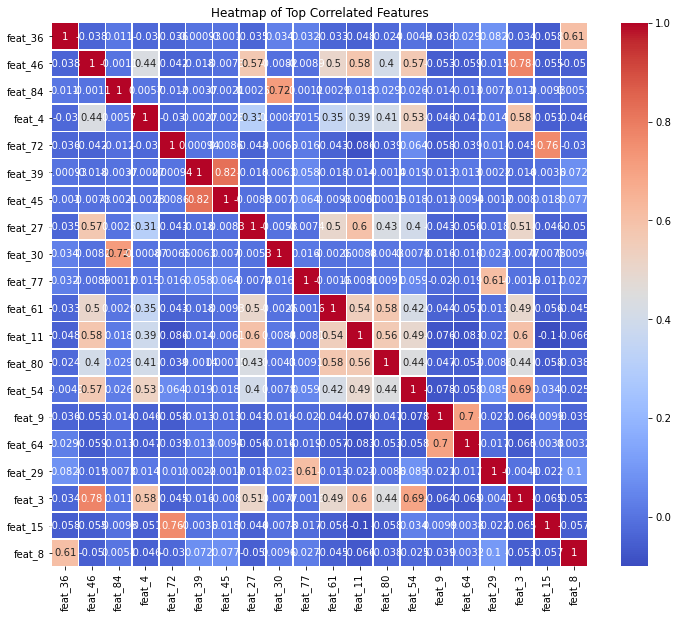

In [12]:
# Your code here
# Get the unique features from top correlated pairs
top_features = list(set([index[0] for index in high_corr_pairs.head(15).index] +
                        [index[1] for index in high_corr_pairs.head(15).index]))

# Plot smaller heatmap for those features
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Top Correlated Features")
plt.show()


## Create a train-test split with a test size of 40%

This is a relatively big training set, so you can assign 40% to the test set. Set the `random_state` to 42. 

In [13]:
# Your code here
from sklearn.model_selection import train_test_split

# Assuming X_scaled is your features and y is your target
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42
)

# Quick check
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (37126, 93)
Test set shape: (24752, 93)


In [ ]:
# Your code here

## Create a baseline model

Create your baseline model *in a pipeline setting*. In the pipeline: 

- Your first step will be to scale your features down to the number of features that ensure you keep just 80% of your explained variance (which we saw before)
- Your second step will be to build a basic logistic regression model 

Make sure to fit the model using the training set and test the result by obtaining the accuracy using the test set. Set the `random_state` to 123. 

NameError: name 'Pipeline' is not defined

In [15]:
# Your code here
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create the pipeline
pipeline = Pipeline([
    ('pca', PCA(n_components=0.80)),  # Retain 80% of explained variance
    ('log_reg', LogisticRegression(random_state=123, max_iter=1000))
])

# Fit the model on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")


Baseline Model Accuracy: 0.7471


In [ ]:
# Your code here

## Create a pipeline consisting of a linear SVM, a simple decision tree, and a simple random forest classifier

Repeat the above, but now create three different pipelines:
- One for a standard linear SVM
- One for a default decision tree
- One for a random forest classifier

In [16]:
# Your code here
# ⏰ This cell may take several minutes to run
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Define the PCA transformation
pca = PCA(n_components=0.80)

# Pipeline 1: Linear SVM
svm_pipeline = Pipeline([
    ('pca', pca),
    ('svm', SVC(kernel='linear', random_state=123))
])

# Pipeline 2: Decision Tree
tree_pipeline = Pipeline([
    ('pca', pca),
    ('tree', DecisionTreeClassifier(random_state=123))
])

# Pipeline 3: Random Forest
rf_pipeline = Pipeline([
    ('pca', pca),
    ('rf', RandomForestClassifier(random_state=123))
])

# Fit and evaluate each pipeline
pipelines = {
    'Linear SVM': svm_pipeline,
    'Decision Tree': tree_pipeline,
    'Random Forest': rf_pipeline
}

for name, model in pipelines.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


Linear SVM Accuracy: 0.7534
Decision Tree Accuracy: 0.6740
Random Forest Accuracy: 0.7809


## Pipeline with grid search

Construct two pipelines with grid search:
- one for random forests - try to have around 40 different models
- one for the AdaBoost algorithm 

### Random Forest pipeline with grid search

In [20]:
# Your code here 
# imports
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np


In [18]:
# Your code here
# ⏰ This cell may take a long time to run!
# Random Forest pipeline
rf_pipeline = Pipeline([
    ('pca', PCA(n_components=0.80)),
    ('rf', RandomForestClassifier(random_state=123))
])

# Random Forest hyperparameter grid
rf_param_grid = {
    'rf__n_estimators': [50, 100, 150, 200],              
    'rf__max_depth': [None, 10, 20, 30, 40],              
    'rf__max_features': ['sqrt', 'log2']                  
}

# Total models: 4 * 5 * 2 = 40

# Random Forest grid search
rf_grid = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit
rf_grid.fit(X_train, y_train)

# Evaluate
print("Random Forest Best Params:", rf_grid.best_params_)
print("Random Forest Best Score (Train CV):", rf_grid.best_score_)
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_grid.predict(X_test)))


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 18.0min finished


Random Forest Best Params: {'rf__max_depth': 30, 'rf__max_features': 'sqrt', 'rf__n_estimators': 200}
Random Forest Best Score (Train CV): 0.7728546486193545
Random Forest Test Accuracy: 0.78219941822883


Use your grid search object along with `.cv_results` to get the full result overview

In [19]:
# Your code here 
import pandas as pd

# Convert to DataFrame
rf_results = pd.DataFrame(rf_grid.cv_results_)

# View top 10 sorted by mean test score
rf_results.sort_values(by='mean_test_score', ascending=False).head(10)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__max_features,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
27,107.164952,1.010219,1.391490,0.007564,30,sqrt,200,"{'rf__max_depth': 30, 'rf__max_features': 'sqr...",0.771170,0.773657,0.773737,0.772855,0.001192,1
35,135.572200,1.794107,1.766135,0.251866,40,sqrt,200,"{'rf__max_depth': 40, 'rf__max_features': 'sqr...",0.769877,0.772040,0.775515,0.772478,0.002322,2
26,81.129938,0.735921,1.054925,0.015729,30,sqrt,150,"{'rf__max_depth': 30, 'rf__max_features': 'sqr...",0.770766,0.772848,0.773818,0.772478,0.001273,3
3,129.893550,0.455538,1.732507,0.009454,None,sqrt,200,"{'rf__max_depth': None, 'rf__max_features': 's...",0.769958,0.772525,0.774545,0.772343,0.001877,4
31,78.725352,0.342412,1.446623,0.022696,30,log2,200,"{'rf__max_depth': 30, 'rf__max_features': 'log...",0.770766,0.771717,0.773414,0.771966,0.001095,5
2,94.423735,2.054666,1.288732,0.040729,None,sqrt,150,"{'rf__max_depth': None, 'rf__max_features': 's...",0.768180,0.771879,0.774384,0.771481,0.002548,6
34,91.737536,3.423459,1.307117,0.042597,40,sqrt,150,"{'rf__max_depth': 40, 'rf__max_features': 'sqr...",0.768180,0.771717,0.774545,0.771481,0.002604,7
7,96.332255,0.491360,1.711099,0.045498,None,log2,200,"{'rf__max_depth': None, 'rf__max_features': 'l...",0.769069,0.770505,0.773737,0.771104,0.001952,8
39,87.647332,1.846410,1.480976,0.049048,40,log2,200,"{'rf__max_depth': 40, 'rf__max_features': 'log...",0.768827,0.770020,0.773899,0.770915,0.002165,9
30,59.717695,0.274979,1.082195,0.016415,30,log2,150,"{'rf__max_depth': 30, 'rf__max_features': 'log...",0.768827,0.770586,0.771879,0.770430,0.001251,10


### AdaBoost

In [22]:
# Your code here
# ⏰ This cell may take several minutes to run
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define the pipeline
ada_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.80)),
    ('ada', AdaBoostClassifier(random_state=123))
])

# Define parameter grid
ada_param_grid = {
    'ada__n_estimators': [50, 100, 150],
    'ada__learning_rate': [0.01, 0.1, 1.0]
}

# Grid search
ada_grid = GridSearchCV(ada_pipeline, ada_param_grid, cv=5, verbose=1, n_jobs=-1)
ada_grid.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  8.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=0.8)),
                                       ('ada',
                                        AdaBoostClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.01, 0.1, 1.0],
                         'ada__n_estimators': [50, 100, 150]},
             verbose=1)

Use your grid search object along with `.cv_results` to get the full result overview: 

In [23]:
# Your code here 
import pandas as pd

# For Random Forest
rf_results_df = pd.DataFrame(rf_grid.cv_results_)
print("Top 5 Random Forest Models by Mean Test Score:")
display(rf_results_df.sort_values(by='mean_test_score', ascending=False).head())

# For AdaBoost
ada_results_df = pd.DataFrame(ada_grid.cv_results_)
print("\nTop 5 AdaBoost Models by Mean Test Score:")
display(ada_results_df.sort_values(by='mean_test_score', ascending=False).head())


Top 5 Random Forest Models by Mean Test Score:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__max_features,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
27,107.164952,1.010219,1.391490,0.007564,30,sqrt,200,"{'rf__max_depth': 30, 'rf__max_features': 'sqr...",0.771170,0.773657,0.773737,0.772855,0.001192,1
35,135.572200,1.794107,1.766135,0.251866,40,sqrt,200,"{'rf__max_depth': 40, 'rf__max_features': 'sqr...",0.769877,0.772040,0.775515,0.772478,0.002322,2
26,81.129938,0.735921,1.054925,0.015729,30,sqrt,150,"{'rf__max_depth': 30, 'rf__max_features': 'sqr...",0.770766,0.772848,0.773818,0.772478,0.001273,3
3,129.893550,0.455538,1.732507,0.009454,None,sqrt,200,"{'rf__max_depth': None, 'rf__max_features': 's...",0.769958,0.772525,0.774545,0.772343,0.001877,4
31,78.725352,0.342412,1.446623,0.022696,30,log2,200,"{'rf__max_depth': 30, 'rf__max_features': 'log...",0.770766,0.771717,0.773414,0.771966,0.001095,5



Top 5 AdaBoost Models by Mean Test Score:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ada__learning_rate,param_ada__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,125.572964,1.535398,1.836769,0.137279,0.1,150,"{'ada__learning_rate': 0.1, 'ada__n_estimators...",0.654996,0.659663,0.673131,0.673131,0.665320,0.665248,0.007219,1
4,79.408626,0.382187,1.212417,0.068601,0.1,100,"{'ada__learning_rate': 0.1, 'ada__n_estimators...",0.634797,0.642963,0.653872,0.652525,0.652391,0.647310,0.007370,2
6,43.907851,1.013523,0.661757,0.079126,1,50,"{'ada__learning_rate': 1.0, 'ada__n_estimators...",0.602208,0.630168,0.632323,0.647811,0.629091,0.628320,0.014709,3
3,39.633772,0.613470,0.631379,0.037135,0.1,50,"{'ada__learning_rate': 0.1, 'ada__n_estimators...",0.616079,0.591919,0.618451,0.616027,0.611044,0.610704,0.009698,4
7,84.215370,1.166164,1.112745,0.077815,1,100,"{'ada__learning_rate': 1.0, 'ada__n_estimators...",0.600323,0.583838,0.611987,0.628283,0.602155,0.605317,0.014616,5


### Level-up (Optional): SVM pipeline with grid search 

As extra level-up work, construct a pipeline with grid search for support vector machines. 
* Make sure your grid isn't too big. You'll see it takes quite a while to fit SVMs with non-linear kernel functions!

In [24]:
# Your code here
# ⏰ This cell may take a very long time to run!
# Imports
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Define the pipeline: standardize → PCA → SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.80)),
    ('svm', SVC())
])

# Define the parameter grid
svm_param_grid = {
    'svm__kernel': ['rbf', 'poly'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto']
}

# Instantiate GridSearchCV
svm_grid = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model (this may take time)
svm_grid.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 30.8min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=0.8)),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['rbf', 'poly']},
             verbose=2)

Use your grid search object along with `.cv_results` to get the full result overview: 

In [25]:
# Your code here 
# Convert cv_results_ to a DataFrame
import pandas as pd

svm_results_df = pd.DataFrame(svm_grid.cv_results_)

# Display the key columns: mean test score and the parameters
svm_results_df[['mean_test_score', 'std_test_score', 'params']].sort_values(by='mean_test_score', ascending=False)


,mean_test_score,std_test_score,params
10,0.785083,0.003223,"{'svm__C': 10, 'svm__gamma': 'auto', 'svm__ker..."
8,0.783683,0.003394,"{'svm__C': 10, 'svm__gamma': 'scale', 'svm__ke..."
6,0.768922,0.002268,"{'svm__C': 1, 'svm__gamma': 'auto', 'svm__kern..."
4,0.765340,0.003356,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__ker..."
11,0.762889,0.003394,"{'svm__C': 10, 'svm__gamma': 'auto', 'svm__ker..."
9,0.742660,0.002732,"{'svm__C': 10, 'svm__gamma': 'scale', 'svm__ke..."
0,0.724641,0.003818,"{'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__k..."
2,0.720250,0.004494,"{'svm__C': 0.1, 'svm__gamma': 'auto', 'svm__ke..."
7,0.717476,0.005565,"{'svm__C': 1, 'svm__gamma': 'auto', 'svm__kern..."
5,0.665060,0.004553,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__ker..."


## Note

Note that this solution is only one of many options. The results in the Random Forest and AdaBoost models show that there is a lot of improvement possible by tuning the hyperparameters further, so make sure to explore this yourself!

## Summary 

Great! You've gotten a lot of practice in using PCA in pipelines. What algorithm would you choose and why?